# 第四章　顧客の行動を予測する

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
customer = pd.read_csv('Data100/customer.csv')
customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1,2019-04-30,47


## k-meansクラスタリング

In [5]:
customer_clustering = customer[['mean', 'median', 'max', 'min', 'membership_period']]
customer_clustering.head()

,mean,median,max,min,membership_period
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47


In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
customer_clustering_sc = sc.fit_transform(customer_clustering)

kmeans  = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit(customer_clustering_sc)
customer_clustering['cluster'] = clusters.labels_
customer_clustering.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,mean,median,max,min,membership_period,cluster
0,4.833333,5.0,8,2,47,1
1,5.083333,5.0,7,3,47,1
2,4.583333,5.0,6,3,47,1
3,4.833333,4.5,7,2,47,1
4,3.916667,4.0,6,1,47,1


In [7]:
customer_clustering['cluster'].unique()

array([1, 2, 3, 0])

In [11]:
customer_clustering.groupby('cluster').count()

,mean,median,max,min,membership_period
cluster,,,,,
0,841,841,841,841,841
1,1248,1248,1248,1248,1248
2,771,771,771,771,771
3,1332,1332,1332,1332,1332


In [12]:
customer_clustering.groupby('cluster').mean()

,mean,median,max,min,membership_period
cluster,,,,,
0,8.061076,8.046373,10.015458,6.171225,7.027348
1,4.677436,4.671074,7.233173,2.153045,36.925481
2,3.065504,2.900130,4.783398,1.649805,9.276265
3,5.537658,5.388889,8.753754,2.702703,14.876126


## クラスタリングを可視化

In [13]:
from sklearn.decomposition import PCA
X = customer_clustering_sc
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = customer_clustering['cluster']

In [19]:
pca_df.rename(columns={0:'component1', 1: 'component2'}, inplace=True)
pca_df.head()

,component1,component2,cluster
0,-0.819982,-1.959097,1
1,-0.707922,-1.799857,1
2,-1.061499,-1.659826,1
3,-1.160764,-1.810139,1
4,-2.017132,-1.670101,1


In [15]:
pca.explained_variance_ratio_

array([0.69042666, 0.18937526])

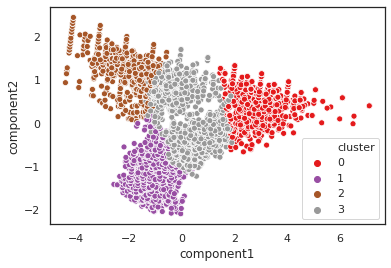

In [22]:
sns.set_style('white')
# for i in customer_clustering['cluster'].unique():
sns.scatterplot(x='component1', y='component2', hue='cluster', data=pca_df, palette='Set1')  

In [26]:
customer_clustering = pd.concat([customer_clustering['cluster'], customer], axis=1)

customer_clustering.head()

,cluster,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,1,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1,2019-04-30,47
1,1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1,2019-04-30,47
2,1,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1,2019-04-30,47
3,1,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1,2019-04-30,47
4,1,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1,2019-04-30,47


In [29]:
customer_clustering.groupby(['cluster', 'routine_flg']).count()

customer_id  name  class  gender  start_date  end_date  \
cluster routine_flg                                                           
0       0                     52    52     52      52          52        13   
        1                    789   789    789     789         789         6   
1       0                      2     2      2       2           2         2   
        1                   1246  1246   1246    1246        1246        16   
2       0                    499   499    499     499         499       499   
        1                    272   272    272     272         272       272   
3       0                    226   226    226     226         226       220   
        1                   1106  1106   1106    1106        1106       322   

                     campaign_id  is_deleted  class_name  price  \
cluster routine_flg                                               
0       0                     52          52          52     52   
        1                    789         789         789    789   
1       0                      2           2           2      2   
        1                   1246        1246        1246   1246   
2       0                    499         499         499    499   
        1                    272         272         272    272   
3       0                    226         226         226    226   
        1                   1106        1106        1106   1106   

                     campaign_name  mean  median   max   min  calc_date  \
cluster routine_flg                                                       
0       0                       52    52      52    52    52         52   
        1                      789   789     789   789   789        789   
1       0                        2     2       2     2     2          2   
        1                     1246  1246    1246  1246  1246       1246   
2       0                      499   499     499   499   499        499   
        1                      272   272     272   272   272        272   
3       0                      226   226     226   226   226        226   
        1                     1106  1106    1106  1106  1106       1106   

                     membership_period  
cluster routine_flg                     
0       0                           52  
        1                          789  
1       0                            2  
        1                         1246  
2       0                          499  
        1                          272  
3       0                          226  
        1                         1106

In [28]:
customer_clustering.groupby(['cluster', 'campaign_name']).count()

customer_id  name  class  gender  start_date  end_date  \
cluster campaign_name                                                           
0       入会費半額                   97    97     97      97          97         3   
        入会費無料                  169   169    169     169         169         3   
        通常                     575   575    575     575         575        13   
1       入会費半額                   65    65     65      65          65         3   
        通常                    1183  1183   1183    1183        1183        15   
2       入会費半額                  175   175    175     175         175       175   
        入会費無料                  127   127    127     127         127       127   
        通常                     469   469    469     469         469       469   
3       入会費半額                  313   313    313     313         313       187   
        入会費無料                  196   196    196     196         196       143   
        通常                     823   823    823     823         823       212   

                       campaign_id  is_deleted  class_name  price  mean  \
cluster campaign_name                                                     
0       入会費半額                   97          97          97     97    97   
        入会費無料                  169         169         169    169   169   
        通常                     575         575         575    575   575   
1       入会費半額                   65          65          65     65    65   
        通常                    1183        1183        1183   1183  1183   
2       入会費半額                  175         175         175    175   175   
        入会費無料                  127         127         127    127   127   
        通常                     469         469         469    469   469   
3       入会費半額                  313         313         313    313   313   
        入会費無料                  196         196         196    196   196   
        通常                     823         823         823    823   823   

                       median   max   min  routine_flg  calc_date  \
cluster campaign_name                                               
0       入会費半額              97    97    97           97         97   
        入会費無料             169   169   169          169        169   
        通常                575   575   575          575        575   
1       入会費半額              65    65    65           65         65   
        通常               1183  1183  1183         1183       1183   
2       入会費半額             175   175   175          175        175   
        入会費無料             127   127   127          127        127   
        通常                469   469   469          469        469   
3       入会費半額             313   313   313          313        313   
        入会費無料             196   196   196          196        196   
        通常                823   823   823          823        823   

                       membership_period  
cluster campaign_name                     
0       入会費半額                         97  
        入会費無料                        169  
        通常                           575  
1       入会費半額                         65  
        通常                          1183  
2       入会費半額                        175  
        入会費無料                        127  
        通常                           469  
3       入会費半額                        313  
        入会費無料                        196  
        通常                           823

In [30]:
customer_clustering.groupby(['cluster', 'is_deleted']).count()

customer_id  name  class  gender  start_date  end_date  \
cluster is_deleted                                                           
0       0                   822   822    822     822         822         0   
        1                    19    19     19      19          19        19   
1       0                  1230  1230   1230    1230        1230         0   
        1                    18    18     18      18          18        18   
2       1                   771   771    771     771         771       771   
3       0                   790   790    790     790         790         0   
        1                   542   542    542     542         542       542   

                    campaign_id  class_name  price  campaign_name  mean  \
cluster is_deleted                                                        
0       0                   822         822    822            822   822   
        1                    19          19     19             19    19   
1       0                  1230        1230   1230           1230  1230   
        1                    18          18     18             18    18   
2       1                   771         771    771            771   771   
3       0                   790         790    790            790   790   
        1                   542         542    542            542   542   

                    median   max   min  routine_flg  calc_date  \
cluster is_deleted                                               
0       0              822   822   822          822        822   
        1               19    19    19           19         19   
1       0             1230  1230  1230         1230       1230   
        1               18    18    18           18         18   
2       1              771   771   771          771        771   
3       0              790   790   790          790        790   
        1              542   542   542          542        542   

                    membership_period  
cluster is_deleted                     
0       0                         822  
        1                          19  
1       0                        1230  
        1                          18  
2       1                         771  
3       0                         790  
        1                         542

## 教師あり学習で翌月の利用回数を予測する

In [31]:
uselog = pd.read_csv('Data100/3_data/use_log.csv')
uselog['usedate'] = pd.to_datetime(uselog['usedate'])
uselog['month'] = uselog['usedate'].dt.strftime('%Y%m')

uselog_month = uselog.groupby(['month', 'customer_id'], as_index = False).count()
uselog_month.rename(columns={'log_id':'count'}, inplace=True)
del uselog_month['usedate']
uselog_month.head()

,month,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


**201810~201903までを回している**

**その中で過去６ヶ月分の利用データを取得して追加**
- count_pred: 予測したい月のデータ
- count_0~当月，一ヶ月前，2．．．と過去半年のデータを並べている

In [33]:
# year_month:uselog_monthのユニーク
year_month = list(uselog_month['month'].unique())
predict_data = pd.DataFrame()

# 6〜year_monthの個数
for i in range(6, len(year_month)):
    
    # tmp：uselog_monthのmonthとi番目のyear_monthが一緒のuselog_month.
    # 月ごとにデータ入れてるってことかな
    tmp = uselog_month.loc[uselog_month['month']==year_month[i]]
    tmp.rename(columns={'count': 'count_pred'}, inplace=True)
    
    for j in range(1,7):
        tmp_before = uselog_month.loc[uselog_month['month']==year_month[i-j]]
        del tmp_before['month']
        tmp_before.rename(columns={'count': 'count_{}'.format(j-1)}, inplace=True)
        tmp = tmp.merge(tmp_before, on='customer_id', how='left')
    predict_data = pd.concat([predict_data, tmp], ignore_index=True)
predict_data.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,month,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS008805,2,2.0,5.0,7.0,8.0,NaN,NaN
2,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
3,201810,AS015233,7,9.0,11.0,5.0,7.0,7.0,NaN
4,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0


In [34]:
predict_data.dropna(inplace=True)
predict_data.reset_index(drop=True)
predict_data.head()

,month,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
2,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
4,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0
5,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0
7,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0


## 特徴変数を付与

In [36]:
predict_data = predict_data.merge(customer[['customer_id', 'start_date']], on='customer_id', how='left')
predict_data.head()

,month,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01


In [38]:
predict_data['now_date'] = pd.to_datetime(predict_data['month'], format = '%Y%m')

In [39]:
predict_data['start_date'] = pd.to_datetime(predict_data['start_date'])

In [41]:
from dateutil.relativedelta import relativedelta
predict_data['period'] = None

for i in range(len(predict_data)):
    delta = relativedelta(predict_data['now_date'][i], predict_data['start_date'][i])
    predict_data['period'][i] = delta.years*12 + delta.months
predict_data.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,month,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date,now_date,period
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01,2018-10-01,23
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01,2018-10-01,35
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01,2018-10-01,39
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01,2018-10-01,16
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01,2018-10-01,12


## 予測モデルを作成

In [84]:
predict_data = predict_data.loc[predict_data['start_date'] >= pd.to_datetime('20180401')]
from sklearn import linear_model
import sklearn.model_selection 
model = linear_model.LinearRegression()
X = predict_data.drop(['month', 'customer_id', 'count_pred', 'start_date', 'now_date'], axis=1)
y = predict_data['count_pred']

In [85]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.3, random_state=0)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
model.score(X_train,y_train)

0.6052645251610272

In [87]:
model.score(X_test, y_test)

0.6126778738436478

In [88]:
model_coef = pd.DataFrame({'feature': X.columns, 'coef': model.coef_})
model_coef

,feature,coef
0,count_0,0.353547
1,count_1,0.186688
2,count_2,0.145645
3,count_3,0.189697
4,count_4,0.082596
5,count_5,0.055141
6,period,0.050902


In [89]:
'''
predict_data2 = predict_data.loc[predict_data['start_date'] >= pd.to_datetime('20180401')]
from sklearn import linear_model
import sklearn.model_selection 
model = linear_model.LinearRegression()
X = predict_data2.drop(['month', 'customer_id', 'count_pred', 'start_date', 'now_date', 'count_5','count_4', 'period'], axis=1)
y = predict_data2['count_pred']

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.3, random_state=0)
model.fit(X_train, y_train)

model.score(X_train,y_train)

model.score(X_test, y_test)
'''

"\npredict_data2 = predict_data.loc[predict_data['start_date'] >= pd.to_datetime('20180401')]\nfrom sklearn import linear_model\nimport sklearn.model_selection \nmodel = linear_model.LinearRegression()\nX = predict_data2.drop(['month', 'customer_id', 'count_pred', 'start_date', 'now_date', 'count_5','count_4', 'period'], axis=1)\ny = predict_data2['count_pred']\n\nX_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.3, random_state=0)\nmodel.fit(X_train, y_train)\n\nmodel.score(X_train,y_train)\n\nmodel.score(X_test, y_test)\n"

In [93]:
# 翌月の来店回数の予測
x1 = [2,3,5,2,3,1,8]
x2 = [7,6,6,5,2,1,8]

In [94]:
x_pred = [x1, x2]

In [95]:
model.predict(x_pred)

array([1.89202426, 4.85196188])

In [96]:
uselog_month.to_csv('Data100/use_log_month.csv', index = False)